In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

# import ClassCOMPAS     as CC ###


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [138]:
def plotConfidenceIntervalsZOOM(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel', pathQuantiles='name'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    


    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = -10
    maxq0_95 = -10
    maxq0_995= -10 
    

    
    
    xright =0.05
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        color_m = colorDirDict[BPSmodelName]
        
        dfname = pathQuantiles +   'distribution_percentiles_model_' + DCOtype +'_' + BPSmodelName + '.csv'
        #         print('now at BPS model name =', BPSmodelName)
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            key_  = xparam + '_' + MSSFRname 
            q0_005, q0_05, q0_25 = df.iloc[0:3][key_]# , df.iloc[1][key_], df.iloc[3][key_]
            q0_5  = df.iloc[4][key_]#[ind_mssfr]
            q0_75 = df.iloc[5][key_]#[ind_mssfr]
            q0_95 = df.iloc[7][key_]#[ind_mssfr]
            q0_995= df.iloc[8][key_]#[ind_mssfr]

            


            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':                      
                        
                    axe.scatter(q0_5, xx,  \
                                c=np.array([color_m]), s=500, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color='white', alpha=1, \
                           height=dxlen, zorder=zorder-1)
                    axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           height=dxlen, zorder=zorder)
############        
        
#         draw names just above one of the bar plots 
            if (ind_m==0) & (xvarind==0):
                # if we are at fiducial model
                fontsize=16
#                 for ind_mssfr, mssfrName in enumerate(MSSFRnameslist):
                xx = dxrange[ind_mssfr]
                dy = (ylim[1]-ylim[0])* (1/12.)
                yy = q0_995 +dy/10. # +dy  #+ (ind_mssfr%3)*dy 
                
                axe.text(yy,  xx,  s=MSSFRname, fontsize=fontsize, color='k',\
                                     ha='left', va='center', weight='bold', alpha=1, rotation=0, zorder=1E10 )
                
     

            
#     xx = [-0.5, len(BPSnameslist)+xright]
#     yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
#     yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
#     yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]


#     axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='white', zorder=0 , alpha =1 )
#     axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
#     axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='white', zorder=2 , alpha =1 )
#     axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
#     axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='white', zorder=4 , alpha =1 )     
#     axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_ylim(-0.5, len(BPSnameslist)+xright)

    axe.set_xlim(ylim[0], ylim[1])
    
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=34)
    
    if (xvarind==7) | (xvarind==8):
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        axe.set_yticks(range(len(BPSnameslist)))
        axe.set_yticklabels(physicalnames,  fontsize=fs) #rotation=55,
    

    if (xvarind!=8) & (xvarind!=7):
        axe.get_yaxis().set_ticks([])
        axe.tick_params(left=False)


    return 
            
            

            
    
    
    
     

In [139]:
# def draw_arrows(axes=None):

#     # ARROWS:
    
# #     ar_c = 'limegreen'
#     ar_c = 'turquoise'
#     ar_lw=4
    
#     # BHBH
#     axe =axes
#     # properties  arrow 
#     strr = r"\textbf{Larger variation}" + '\n' + r'\textbf{in shape}' + '\n'   + r"\textbf{distribution}" #+ '\n'   + r"\textbf{dominates} "
#     x_xy, y_xy = 16.1, 0.7
#     x_xytext, y_xytext = 17.8, 0.3
#     conn = "angle3,angleA=90,angleB=0"

#     # draw arrow
#     axe.annotate(strr,
#       xy=(x_xy, y_xy), xycoords='data',
#       xytext=(x_xytext, y_xytext), textcoords='data',
#       size=15, va="center", ha="right",
#       arrowprops=dict(arrowstyle="-|>",
#                       connectionstyle=conn,
#                       fc="k", ec=ar_c , lw=ar_lw), zorder=20000)    
    
    


    

In [140]:
def my_annotate(ax, s, xytext2, xy_arr=[], *args, **kwargs):
    ans = []
    an = ax.annotate(s, xy_arr[0], *args, **kwargs, zorder=1E6)
    ans.append(an)
    d = {}
    try:
        d['xycoords'] = kwargs['xycoords']
    except KeyError:
        pass
    try:
        d['arrowprops'] = kwargs['arrowprops']
    except KeyError:
        pass
    for xy in xy_arr[1:]:
        an = ax.annotate(s, xy, alpha=0.0, xytext=xytext2, textcoords='data', **d, zorder=1E6, fontsize=fs-4)
        ans.append(an)
    
    return ans





starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies


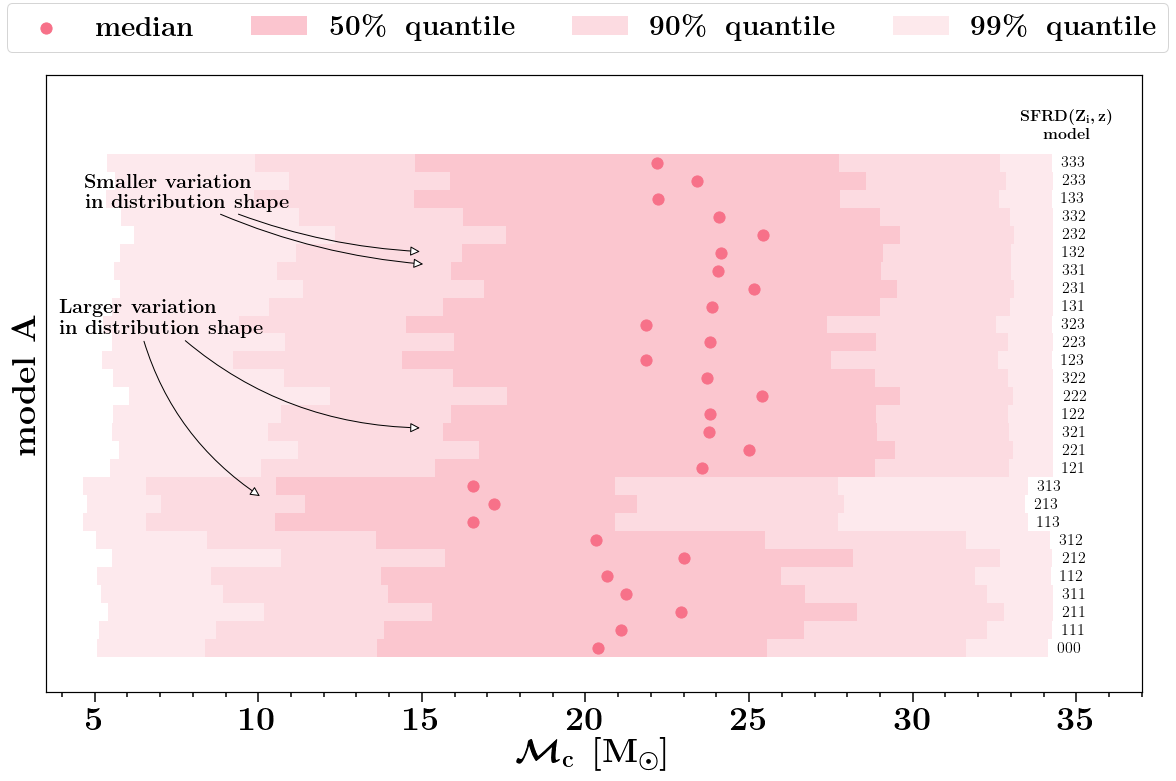

In [153]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 0.51 # extra space on the right 


pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'


xparam = 'ChirpMass'


BPSnameslist =['A']

DCOtype='BBH'
ncols, nrows= 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(16,10), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

ylabel = r'\textbf{model A}'

xlabel = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervalsZOOM(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe,  ylim=[3.5,37], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles)


BPScolors       = sns.color_palette("husl", 17)
for ind_q, interval in enumerate([ '50percent', '90percent', '99percent', 'median']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
        axe.scatter(yy_, xx_, \
                    c=np.asarray([BPScolors[0]]), s=500, label=r'\textbf{median}', \
                    marker='.', zorder=20)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label2=r'$50\%$ \textbf{ quantile}'
            label   = r'\textbf{max }'   r'$50\%$'  + r'\textbf{ quantile}'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label2=r'$90\%$ \textbf{ quantile}'
            label = r'\textbf{max } $90\%$ \textbf{ quantile}'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label2=r'$99\%$ \textbf{ quantile}'
            label = r'\textbf{max } $99\%$ \textbf{ quantile}'


#         axe.barh(xx_, width=(yy[1]-yy[0]), left=yy[0], color='k', alpha=alpha, \
#                height=0.5, zorder=zorder, label=label)
        axe.barh(xx_, width=(yy[1]-yy[0]), left=yy[0], color=BPScolors[0], alpha=alpha, \
               height=0.5, zorder=zorder, label=label2)


handles, labels = axe.get_legend_handles_labels()
    
axe.set_ylim(-0.47, xright)
 
    
strr = r"\textbf{Larger variation}" + '\n' + r'\textbf{in  distribution shape}' # #+ '\n'   + r"\textbf{dominates} "
my_annotate(ax=axe,
            s=strr, xytext2=(3.2, 0.1),
            xy_arr=[ (15,-0.05), (10.1,-0.16)], xycoords='data',
            xytext=(3.9, 0.1), textcoords='data', fontsize=fs-4, ha='left',
#             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3,rad=0.2",
                            fc="w"))
    
    
strr = r"\textbf{Smaller variation}" + '\n' + r'\textbf{in  distribution shape}' # #+ '\n'   + r"\textbf{dominates} "
my_annotate(ax=axe,
            s=strr, xytext2=(4.3, 0.3),
            xy_arr=[ (15,0.23), (15.1,0.21)], xycoords='data',
            xytext=(4.7, 0.3), textcoords='data', fontsize=fs-4, ha='left',
#             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3,rad=0.1",
                            fc="w"))    
    

lgd = f.legend(handles, labels, fontsize=fs+4, ncol=4,\
                bbox_to_anchor=(.51, 1.1) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 

s_mssfr = r'$\rm{SFRD}(Z_{\rm{i}}, z)$ ' + '\n' + r'\textbf{model}'
axe.text(34.7, 0.43,  s=s_mssfr, fontsize=fs-8, color='k',\
                     ha='center', va='center', weight='bold', alpha=1, rotation=0, zorder=1E10 )

     

plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./PercentilePlot_ZOOM.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./PercentilePlot_ZOOM.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()